In [1]:
# Linear regression with Multiple Regressors

In [4]:
# In this chapter we are going to be doing more complex linear regressions
# So we are going to have to be working with more libraries
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import seaborn as sns
import statsmodels.api as sm
# These are all the libraries that we will be using

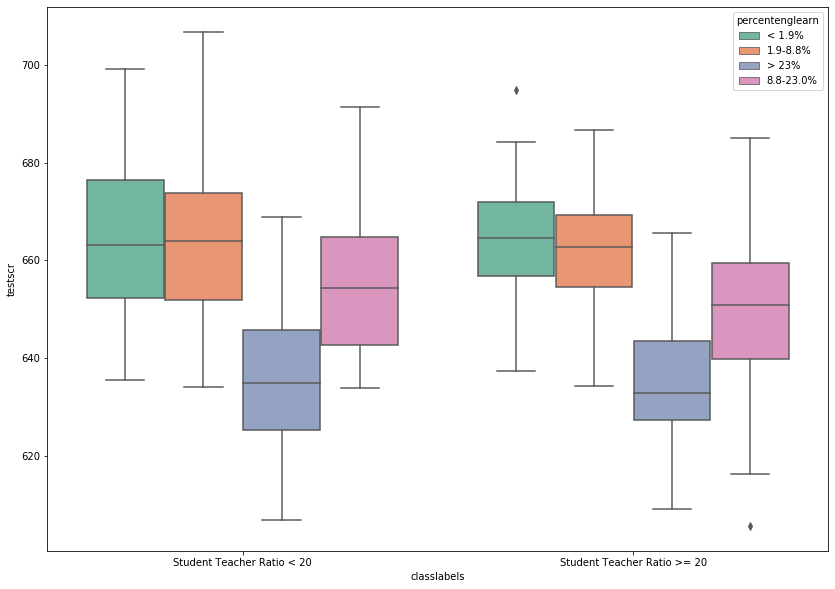

In [32]:
# We are going to try to create Table 6.1 from the S&W book
# We firstly import our data
data = pd.read_csv('caschool.csv')

# We again split our data based on the class size
data['ClassSizeSmall'] = data['str'] < 20

# We name the the class size variables
converter = {0:'Student Teacher Ratio >= 20', 1:'Student Teacher Ratio < 20'}

# We do the actual conversion
data['classlabels'] = data.ClassSizeSmall.apply(lambda x: converter[x])

# Defining a function for each subgroup - splitting job will be done later
def percentage_en_learner(x):
    if x < 1.9:
        return '< 1.9%'
    elif 1.9 <= x < 8.8:
        return '1.9-8.8%'
    elif 8.8 <= x < 23.0:
        return '8.8-23.0%'
    elif x >= 23:
        return '> 23%'


data['percentenglearn'] = data['el_pct'].apply(percentage_en_learner)

plt.figure(figsize=(14, 10))
sns.boxplot(x='classlabels', y='testscr', hue='percentenglearn', data=data, palette='Set2')

plt.show()

# For some reason the Box plot is a little bit out of order so beware!

In [35]:
data['ClassSizeSmall'] = data['str'] < 20
converter = {False:0, True:1}
data.ClassSizeSmall = data.ClassSizeSmall.apply(lambda x: converter[x])

data

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,...,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr,ClassSizeSmall,classlabels,percentenglearn
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,...,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,1,Student Teacher Ratio < 20,< 1.9%
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,...,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,0,Student Teacher Ratio >= 20,1.9-8.8%
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,...,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,1,Student Teacher Ratio < 20,> 23%
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,...,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000,1,Student Teacher Ratio < 20,< 1.9%
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,...,0.128090,5235.987793,18.671330,9.080333,13.857677,641.799988,639.900024,1,Student Teacher Ratio < 20,8.8-23.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,...,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012,1,Student Teacher Ratio < 20,1.9-8.8%
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,...,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000,1,Student Teacher Ratio < 20,1.9-8.8%
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,...,0.102041,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012,0,Student Teacher Ratio >= 20,> 23%
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,...,0.138614,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000,0,Student Teacher Ratio >= 20,1.9-8.8%


In [36]:
dummies = pd.get_dummies(data['percentenglearn'])
dummies

,1.9-8.8%,8.8-23.0%,< 1.9%,> 23%
0,0,0,1,0
1,1,0,0,0
2,0,0,0,1
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
415,1,0,0,0
416,1,0,0,0
417,0,0,0,1
418,1,0,0,0


In [37]:
data = pd.concat([data, dummies], axis=1)
data

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,...,el_pct,read_scr,math_scr,ClassSizeSmall,classlabels,percentenglearn,1.9-8.8%,8.8-23.0%,< 1.9%,> 23%
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,...,0.000000,691.599976,690.000000,1,Student Teacher Ratio < 20,< 1.9%,0,0,1,0
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,...,4.583333,660.500000,661.900024,0,Student Teacher Ratio >= 20,1.9-8.8%,1,0,0,0
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,...,30.000002,636.299988,650.900024,1,Student Teacher Ratio < 20,> 23%,0,0,0,1
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,...,0.000000,651.900024,643.500000,1,Student Teacher Ratio < 20,< 1.9%,0,0,1,0
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,...,13.857677,641.799988,639.900024,1,Student Teacher Ratio < 20,8.8-23.0%,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,...,5.995935,700.900024,707.700012,1,Student Teacher Ratio < 20,1.9-8.8%,1,0,0,0
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,...,4.726101,704.000000,709.500000,1,Student Teacher Ratio < 20,1.9-8.8%,1,0,0,0
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,...,24.263039,648.299988,641.700012,0,Student Teacher Ratio >= 20,> 23%,0,0,0,1
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,...,2.970297,667.900024,676.500000,0,Student Teacher Ratio >= 20,1.9-8.8%,1,0,0,0


In [69]:
dummy_1_test_score = []
counter = 0
for i in range(len(data)):
    if data['< 1.9%'][i] == 1 and data['ClassSizeSmall'][i] == 1:
        dummy_1_test_score.append(data['testscr'][counter])
        counter += 1
    elif data['< 1.9%'][i] == 0 or data['ClassSizeSmall'][i] == 0:
        counter += 1
        continue
a = pd.DataFrame(dummy_1_test_score)
print('The simple statistics of test score of a Small size classroom with smaller than 1.9% English Learners')
a.describe()

The simple statistics of test score of a Small size classroom with smaller than 1.9% English Learners


,0
count,76.000000
mean,664.470391
std,15.850906
min,635.450012
25%,652.224976
50%,663.174988
75%,676.350006
max,699.099976


In [70]:
dummy_2_test_score = []
counter = 0
for i in range(len(data)):
    if data['1.9-8.8%'][i] == 1 and data['ClassSizeSmall'][i] == 1:
        dummy_2_test_score.append(data['testscr'][counter])
        counter += 1
    elif data['1.9-8.8%'][i] == 0 or data['ClassSizeSmall'][i] == 0:
        counter += 1
        continue
b = pd.DataFrame(dummy_2_test_score)
print('The simple statistics of test score of a Small size classroom with 1.9-8.8% English Learners')
b.describe()

The simple statistics of test score of a Small size classroom with 1.9-8.8% English Learners


,0
count,64.000000
mean,665.157029
std,18.596873
min,634.000000
25%,651.775024
50%,664.025024
75%,673.787506
max,706.750000


In [71]:
dummy_3_test_score = []
counter = 0
for i in range(len(data)):
    if data['8.8-23.0%'][i] == 1 and data['ClassSizeSmall'][i] == 1:
        dummy_3_test_score.append(data['testscr'][counter])
        counter += 1
    elif data['8.8-23.0%'][i] == 0 or data['ClassSizeSmall'][i] == 0:
        counter += 1
        continue
c = pd.DataFrame(dummy_3_test_score)
print('The simple statistics of test score of a Small size classroom with 8.8-23.0% English Learners')
c.describe()

The simple statistics of test score of a Small size classroom with 8.8-23.0% English Learners


,0
count,54.000000
mean,654.882406
std,14.564583
min,633.900024
25%,642.562515
50%,654.349976
75%,664.712509
max,691.349976


In [72]:
dummy_4_test_score = []
counter = 0
for i in range(len(data)):
    if data['> 23%'][i] == 1 and data['ClassSizeSmall'][i] == 1:
        dummy_4_test_score.append(data['testscr'][counter])
        counter += 1
    elif data['> 23%'][i] == 0 or data['ClassSizeSmall'][i] == 0:
        counter += 1
        continue
d = pd.DataFrame(dummy_4_test_score)
print('The simple statistics of test score of a Small size classroom with larger than 23% English Learners')
d.describe()

The simple statistics of test score of a Small size classroom with larger than 23% English Learners


,0
count,44.000000
mean,636.730687
std,15.361727
min,606.750000
25%,625.287476
50%,634.924988
75%,645.699966
max,668.900024


In [73]:
dummy_5_test_score = []
counter = 0
for i in range(len(data)):
    if data['< 1.9%'][i] == 1 and data['ClassSizeSmall'][i] == 0:
        dummy_5_test_score.append(data['testscr'][counter])
        counter += 1
    elif data['< 1.9%'][i] == 0 or data['ClassSizeSmall'][i] == 1:
        counter += 1
        continue
e = pd.DataFrame(dummy_5_test_score)
print('The simple statistics of test score of a Big size classroom with smaller than 1.9% English Learners')
e.describe()

The simple statistics of test score of a Big size classroom with smaller than 1.9% English Learners


,0
count,27.000000
mean,665.370377
std,12.148591
min,637.349976
25%,656.750031
50%,664.449951
75%,671.900024
max,694.800049


In [74]:
dummy_6_test_score = []
counter = 0
for i in range(len(data)):
    if data['1.9-8.8%'][i] == 1 and data['ClassSizeSmall'][i] == 0:
        dummy_6_test_score.append(data['testscr'][counter])
        counter += 1
    elif data['1.9-8.8%'][i] == 0 or data['ClassSizeSmall'][i] == 1:
        counter += 1
        continue
f = pd.DataFrame(dummy_6_test_score)
print('The simple statistics of test score of a Small size classroom with 1.9-8.8% English Learners')
f.describe()

The simple statistics of test score of a Small size classroom with 1.9-8.8% English Learners


,0
count,44.000000
mean,661.828405
std,11.741566
min,634.199951
25%,654.524994
50%,662.625000
75%,669.162476
max,686.699951


In [75]:
dummy_7_test_score = []
counter = 0
for i in range(len(data)):
    if data['8.8-23.0%'][i] == 1 and data['ClassSizeSmall'][i] == 0:
        dummy_7_test_score.append(data['testscr'][counter])
        counter += 1
    elif data['8.8-23.0%'][i] == 0 or data['ClassSizeSmall'][i] == 1:
        counter += 1
        continue
g = pd.DataFrame(dummy_7_test_score)
print('The simple statistics of test score of a Small size classroom with 8.8-23.0% English Learners')
g.describe()

The simple statistics of test score of a Small size classroom with 8.8-23.0% English Learners


,0
count,50.000000
mean,649.713007
std,15.962578
min,605.550049
25%,639.787506
50%,650.899994
75%,659.387512
max,684.950012


In [76]:
dummy_8_test_score = []
counter = 0
for i in range(len(data)):
    if data['> 23%'][i] == 1 and data['ClassSizeSmall'][i] == 0:
        dummy_8_test_score.append(data['testscr'][counter])
        counter += 1
    elif data['> 23%'][i] == 0 or data['ClassSizeSmall'][i] == 1:
        counter += 1
        continue
h = pd.DataFrame(dummy_8_test_score)
print('The simple statistics of test score of a Small size classroom with larger than 23% English Learners')
h.describe()

The simple statistics of test score of a Small size classroom with larger than 23% English Learners


,0
count,61.000000
mean,634.836888
std,12.163882
min,609.000000
25%,627.299988
50%,632.849976
75%,643.400024
max,665.650024


In [78]:
print(a.mean()-e.mean())
print(b.mean()-f.mean())
print(c.mean()-g.mean())
print(d.mean()-h.mean())

0   -0.899986
dtype: float64
0    3.328624
dtype: float64
0    5.169399
dtype: float64
0    1.893798
dtype: float64


In [79]:
# 6.2 The Multiple Regression Model
# Providing some of the formulas for Multiple regression models;

# The population regression line
# E(Y_i | X_1i = x_1, X_2i = x_2) = B0 + B1*x_1 + B2*x_2

# The population Multiple Regression Model
# Y_i = B0 + B1*X_1i + B2*X_2i + u_i, i = 1,...,n


In [82]:
# Now it is time to show new methods to use for regression analysis:
# This is the previous one variable linear regression that we made
simple = ols("testscr ~ str", data = data).fit()
simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           2.78e-06
Time:                        00:58:08   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330      9.467     73.825      0.000     680.323     717.543
str           -2.2798      0.480     -4.751      0.000      -3.223      -1.337
==============================================================================
Omnibus:                        5.390   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.589
Skew:                          -0.012   Prob(JB):                        0.166
Kurtosis:                       2.548   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
simple = ols("testscr ~ str", data = data).fit(cov_type = 'HC1')
simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     19.26
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           1.45e-05
Time:                        00:59:08   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330     10.364     67.436      0.000     678.619     719.247
str           -2.2798      0.519     -4.389      0.000      -3.298      -1.262
==============================================================================
Omnibus:                        5.390   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.589
Skew:                          -0.012   Prob(JB):                        0.166
Kurtosis:                       2.548   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [87]:
Multiple = ols("testscr ~ str + el_pct", data = data).fit()
Multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     155.0
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           4.62e-51
Time:                        01:06:52   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      7.411     92.566      0.000     671.464     700.600
str           -1.1013      0.380     -2.896      0.004      -1.849      -0.354
el_pct        -0.6498      0.039    -16.516      0.000      -0.727      -0.572
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.550
Skew:                           0.088   Prob(JB):                        0.760
Kurtosis:                       3.024   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
Multiple = ols("testscr ~ str + el_pct", data = data).fit(cov_type = 'HC1')
Multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     223.8
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           9.28e-67
Time:                        01:13:27   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3439.
Df Residuals:                     417   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.0322      8.728     78.599      0.000     668.925     703.139
str           -1.1013      0.433     -2.544      0.011      -1.950      -0.253
el_pct        -0.6498      0.031    -20.939      0.000      -0.711      -0.589
==============================================================================
Omnibus:                        0.631   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.550
Skew:                           0.088   Prob(JB):                        0.760
Kurtosis:                       3.024   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [89]:
Triple = ols('testscr ~ str + el_pct + meal_pct', data = data).fit()
Triple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     476.3
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          4.03e-134
Time:                        01:09:21   Log-Likelihood:                -1520.5
No. Observations:                 420   AIC:                             3049.
Df Residuals:                     416   BIC:                             3065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.1500      4.686    149.423      0.000     690.939     709.361
str           -0.9983      0.239     -4.181      0.000      -1.468      -0.529
el_pct        -0.1216      0.032     -3.762      0.000      -0.185      -0.058
meal_pct      -0.5473      0.022    -25.341      0.000      -0.590      -0.505
==============================================================================
Omnibus:                        6.998   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.030   Jarque-Bera (JB):               10.626
Skew:                          -0.024   Prob(JB):                      0.00493
Kurtosis:                       3.778   Cond. No.                         621.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
# Now let's go to the Practice questions

In [9]:
#1
# This is the formula: rbarSquare = 1 - ((n-1)/(n-k-1)) * (1-Rsquare)
print("First regression's R bar Square is {}".format(1 - ((7178-1)/(7178-2-1)) * (1-0.165)))
print("Second regression's R bar Square is {}".format(1 - ((7178-1)/(7178-2-1)) * (1-0.182)))
print("Third regression's R bar Square is {}".format(1 - ((7178-1)/(7178-2-1)) * (1-0.185)))


First regression's R bar Square is 0.16476724738675952
Second regression's R bar Square is 0.1817719860627176
Third regression's R bar Square is 0.18477282229965153


In [10]:
#2
#a
print('Workers with college degrees earn 10.47$ more than only highschool graduates')
#b
print('Men earn 4.69$ more on average than women')

Workers with college degrees earn 10.47$ more than only highschool graduates
Men earn 4.69$ more on average than women


In [12]:
#3
#a
print('On average, a worker earns $0.61/hour more for each year he ages.')
#b
print("Sally’s earnings prediction is 0.11 + 10.44×1 - 4.56×1 + 0.61×29 = 23.68 dollars per hour.")
print("Betsy’s earnings prediction is 0.11 + 10.44×1 - 4.56×1 + 0.61×34 = 26.73 dollars per hour. The difference is 3.05 $/hour (= 0.61× (34-29)).")

On average, a worker earns $0.61/hour more for each year he ages.
Sally’s earnings prediction is 0.11 + 10.44×1 - 4.56×1 + 0.61×29 = 23.68 dollars per hour.
Betsy’s earnings prediction is 0.11 + 10.44×1 - 4.56×1 + 0.61×34 = 26.73 dollars per hour. The difference is 3.05 $/hour (= 0.61× (34-29)).


In [17]:
#5
#a
print("Expected increase in the value of the house", 23400)
#b
print("Expected increase in the value of the house", 1000*(23.4+0.156*100))
#c
print('The loss is 48800')
#d
print('R square is 0.727')

Expected increase in the value of the house 23400
Expected increase in the value of the house 39000.0
The loss is 48800
R square is 0.727
